<a href="https://colab.research.google.com/github/ayushjn1995/global_terrorism/blob/main/CH_Time_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Query Done 
1. Yearwise attack count (Bar Line Graph) - Harshal 
2. How many attacks done in whhich country (World Map) - (Harshal)
3. How many attacks done in the regions (World Map) - (Harshal)
4. How much attack done on which target type  (2 way plot) - (Ayush)
5. count of the total attack vs attack type (pie chart) - (Ayush)
6. Attack type vs damage (In Ayush Collab) (pie chart) (Ayush)
7. Top terrorist group and the most preffered country to attack by them (World Map) - have to done the changes in that (Prabhat)
8. No. of attack happened in each year in India (bar line chart) (Prabhat)
9. No. of citizens killed vs the year in which thta happened in India (Bar chart) (Prabhat)
10. Statewise terrorist group (change to Line graph) (Sarvesh)
11. Most affected city by the terrorism in India (shapefile map, polium (Sarvesh)
12. Damage done by the attacks type in India (bar Chart)  or (Pie chart) (Sarvesh)


*****Not Done *****
13. Attacks done in each year in each country with the counts of attack using line chart (line chart ) 
14. Terrorist group active in which in the whole decade  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
pd.set_option("display.max_colwidth", -1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
working_directory = '/content/drive/My Drive/Almabetter/'
df = pd.read_csv(working_directory + 'Global_Terrorism_Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]
sub_df.rename(columns = {'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','nwound':'total_wounds','gname':'terrorist_group'},inplace=True)
sub_df.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,total_wounds,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League


In [11]:
sub_df["attack_type"] =sub_df['attack_type'].apply(lambda x: x if x in ['Assassination', 'Hostage Taking (Kidnapping)','Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking','Unarmed Assault', 'Hostage Taking (Barricade Incident)'] else 'Others')
g = sub_df.groupby("attack_type").size().reset_index(name="count")
hostage_count = g.loc[5,"count"] + g.loc[6,"count"]

# g = g.append(k, ignore_index = True)

g.loc[7,"count"] = g.loc[7,"count"] + g.loc[4,"count"] + g.loc[8,"count"]
g = g.drop([4,5,6,8])
g.reset_index(inplace = True)
g


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,attack_type,count
0,0,Armed Assault,42669
1,1,Assassination,19312
2,2,Bombing/Explosion,88255
3,3,Facility/Infrastructure Attack,10356
4,7,Others,8950


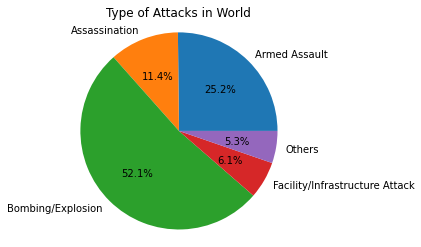

In [15]:

my_labels = ["Armed Assault",	"Assassination",	"Bombing/Explosion",	"Facility/Infrastructure Attack","Others"]
plt.pie(g["count"],labels=my_labels,autopct='%1.1f%%')
plt.title('Type of Attacks in World')
plt.axis('equal')
plt.show()


In [20]:
attack_df=sub_df[['attack_type','total_kills','total_wounds']]
attack_df.groupby('attack_type').agg({'attack_type':'count','total_kills':'sum','total_wounds':'sum'}).rename(columns={'attack_type':'total_attacks'}).sort_values('total_attacks',ascending=False)


,total_attacks,total_kills,total_wounds
attack_type,,,
Bombing/Explosion,88255,157321.0,372686.0
Armed Assault,42669,160297.0,77366.0
Assassination,19312,24920.0,13887.0
Hostage Taking (Kidnapping),11158,24231.0,6446.0
Facility/Infrastructure Attack,10356,3642.0,3765.0
Others,7276,32381.0,14725.0
Unarmed Assault,1015,880.0,14027.0
Hostage Taking (Barricade Incident),991,4478.0,3966.0
Hijacking,659,3718.0,17001.0


In [19]:
target_df=sub_df[['target_type','total_kills']].copy()
target_wise=target_df.groupby('target_type').agg({'target_type':'count','total_kills':'sum'}).rename(columns={'target_type':'total_attacks'}).sort_values('total_attacks',ascending=False)
target_wise['total_damage']=target_wise.total_attacks+target_wise.total_kills
target_wise.sort_values('total_damage',ascending=False).reset_index()

,target_type,total_attacks,total_kills,total_damage
0,Private Citizens & Property,43511,140504.0,184015.0
1,Military,27984,106047.0,134031.0
2,Police,24506,53704.0,78210.0
3,Government (General),21283,26071.0,47354.0
4,Business,20669,23487.0,44156.0
5,Transportation,6799,13916.0,20715.0
6,Religious Figures/Institutions,4440,13413.0,17853.0
7,Terrorists/Non-State Militia,3039,9088.0,12127.0
8,Unknown,5898,4329.0,10227.0
9,Educational Institution,4322,3745.0,8067.0
